In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('lixas111.csv')

In [3]:
df_one_hot = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','poutcome'])
df_one_hot

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,29,751,23,121,2,-1,0,no,0,0,...,1,1,0,0,0,1,0,0,0,1
1,47,6695,21,129,3,-1,0,no,1,0,...,0,1,0,0,1,0,0,0,0,1
2,26,82,5,228,1,-1,0,no,1,0,...,1,1,0,0,0,1,0,0,0,1
3,66,53,12,562,4,-1,0,yes,0,0,...,0,1,0,1,0,0,0,0,0,1
4,36,127,18,172,3,-1,0,no,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,47,4157,11,90,3,-1,0,no,0,1,...,0,1,0,0,0,1,0,0,0,1
3996,53,2124,17,121,2,344,2,no,0,0,...,1,1,0,1,0,0,1,0,0,0
3997,30,31,8,229,1,-1,0,no,0,0,...,0,1,0,0,0,1,0,0,0,1
3998,43,743,23,323,3,-1,0,no,0,0,...,0,0,1,1,0,0,0,0,0,1


In [4]:
df_x = df_one_hot.drop('y', axis=1)
df_x = df_x.drop('duration',axis=1)

In [5]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_x)

In [6]:
df_x_standardised = pd.DataFrame(columns=df_x.columns,data=df_standardized)
df_x_standardised

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.122307,-0.231920,0.890090,-0.235572,-0.429368,-0.311846,-0.352907,-0.509748,-0.172818,-0.154284,...,0.93135,0.415544,-0.415544,-1.427307,-0.262033,1.665408,-0.358259,-0.193942,-0.223313,0.496091
1,0.549106,1.792960,0.648152,0.092180,-0.429368,-0.311846,2.833610,-0.509748,-0.172818,-0.154284,...,-1.07371,0.415544,-0.415544,-1.427307,3.816307,-0.600453,-0.358259,-0.193942,-0.223313,0.496091
2,-1.400876,-0.459821,-1.287352,-0.563323,-0.429368,-0.311846,2.833610,-0.509748,-0.172818,-0.154284,...,0.93135,0.415544,-0.415544,-1.427307,-0.262033,1.665408,-0.358259,-0.193942,-0.223313,0.496091
3,2.313375,-0.469700,-0.440569,0.419932,-0.429368,-0.311846,-0.352907,-0.509748,-0.172818,-0.154284,...,-1.07371,0.415544,-0.415544,0.700620,-0.262033,-0.600453,-0.358259,-0.193942,-0.223313,0.496091
4,-0.472313,-0.444491,0.285245,0.092180,-0.429368,-0.311846,-0.352907,-0.509748,-0.172818,-0.154284,...,-1.07371,0.415544,-0.415544,0.700620,-0.262033,-0.600453,-0.358259,-0.193942,-0.223313,0.496091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.549106,0.928366,-0.561538,0.092180,-0.429368,-0.311846,-0.352907,1.961756,-0.172818,-0.154284,...,-1.07371,0.415544,-0.415544,-1.427307,-0.262033,1.665408,-0.358259,-0.193942,-0.223313,0.496091
3996,1.106243,0.235806,0.164276,-0.235572,2.928223,0.649529,-0.352907,-0.509748,-0.172818,-0.154284,...,0.93135,0.415544,-0.415544,0.700620,-0.262033,-0.600453,2.791274,-0.193942,-0.223313,-2.015761
3997,-1.029451,-0.477195,-0.924445,-0.563323,-0.429368,-0.311846,-0.352907,-0.509748,5.786429,-0.154284,...,-1.07371,0.415544,-0.415544,-1.427307,-0.262033,1.665408,-0.358259,-0.193942,-0.223313,0.496091
3998,0.177680,-0.234645,0.890090,0.092180,-0.429368,-0.311846,-0.352907,-0.509748,-0.172818,6.481570,...,-1.07371,-2.406485,2.406485,0.700620,-0.262033,-0.600453,-0.358259,-0.193942,-0.223313,0.496091


In [7]:
df_y = df_one_hot['y']

df_y

le = LabelEncoder()


y = le.fit_transform(df_y)

In [8]:
df_y = pd.DataFrame(y, columns=['y'])
df_y

,y
0,0
1,0
2,0
3,1
4,0
...,...
3995,0
3996,0
3997,0
3998,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_x_standardised, df_y, test_size=0.20, random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
accuracy_rate = []

# calculate accuracy rate k value
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_x_standardised,df['y'],cv=10)
    accuracy_rate.append(score.mean())

In [12]:
error_rate = []

# calculate error rate k value
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_x_standardised,df['y'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

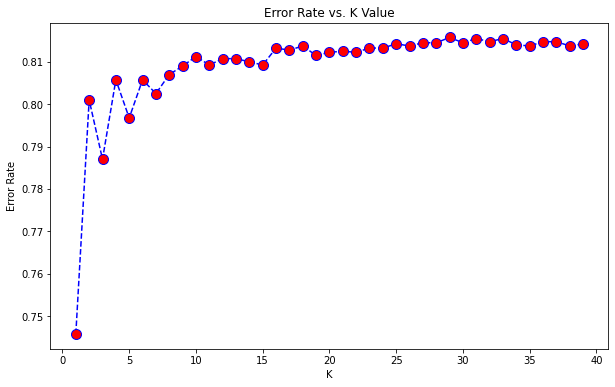

In [13]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
knn20 = KNeighborsClassifier(n_neighbors = 20)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn20.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_24 = knn20.predict(X_test)
y_pred_1 = knn1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=20", accuracy_score(y_test, y_pred_24)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=20 81.875
Accuracy with k=1 72.0


In [17]:
from sklearn.metrics import classification_report

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred_1))
print('\n')
print(classification_report(y_test,y_pred_1))

WITH K=1


[[505 131]
 [ 93  71]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       636
           1       0.35      0.43      0.39       164

    accuracy                           0.72       800
   macro avg       0.60      0.61      0.60       800
weighted avg       0.74      0.72      0.73       800



In [18]:
print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,y_pred_24))
print('\n')
print(classification_report(y_test,y_pred_24))

WITH K=20


[[613  23]
 [122  42]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89       636
           1       0.65      0.26      0.37       164

    accuracy                           0.82       800
   macro avg       0.74      0.61      0.63       800
weighted avg       0.80      0.82      0.79       800



In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Use the cross_val_score function to evaluate the model using K-fold cross-validation
scores = cross_val_score(knn20, df_x, y, cv=kfold)

# Print the mean and standard deviation of the scores
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))


Accuracy: 79.15% (0.80%)
